<a href="https://colab.research.google.com/github/enes-karatas/AI_ML_Projects/blob/main/NLP_Project_NLP_Based_Sentiment_Analysis%26Classification_on_Customer_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis and Classification on Customer Reviews text Data using Natural Language Processing

### Insight :
BikeEase receives thousands of customer reviews and feedback across multiple platforms. However, manually analyzing this data is inefficient. The goal of this capstone is to develop an NLP-powered sentiment analysis system that automatically classifies reviews as positive, neutral, or negative. Additionally, we will perform topic modeling to uncover key themes in customer feedback.

### Objective :
Objective is to analyze customer reviews, extract insights, and understand sentiment to improve BikeEase services.
Develop an end-to-end NLP pipeline to analyze customer reviews for sentiment classification and key topic extraction. This system will help BikeEase identify customer pain points and areas of improvement.

### Summary :
- Built NLP models to perform sentiment analysis on customer review text data.
- Conducted feature engineering and classification using logistic regression, Naive Bayes, LSTM, BERT and RoBERTa to analyze sentiment and improve prediction performance.


#### Dataset : https://drive.google.com/drive/folders/13-g3jxhPR0btN_s77KbcempcFXZ0RoqT

#Contents

### 1. Data Understanding & Preprocessing
- 1.1. Data Understanding & Preprocessing Report

### 2. Sentiment Analysis
- 2.1. Logistic Regression Model Prediction
- 2.2. Logistic Regression Model Prediction Report
- 2.3. Naive Bayes Model Prediction
- 2.4. Naive Bayes Model Prediction Report
- 2.5. LSTM Model Prediction
- 2.6. LSTM Model Prediction Report
- 2.7. BERT Model Prediction
- 2.8. BERT Model Prediction Report
- 2.9. RoBERTa Model Prediction
- 2.10. RoBERTa Model Prediction Report
- 2.11. Sentiment Analysis Report

### 3. Final Report

--------------------------------------------------------------------------------

# 1. Data Collection and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Getting NLTK toolkit to handle removing punctuation, stopword removal, lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For better lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Getting dataset in dataframe
df_raw = pd.read_csv('bike_rental_reviews.csv', encoding='latin-1')
df = df_raw.copy()

df.head()

,review_text,sentiment
0,"The entire process was easy, and the availabil...",positive
1,Standard rental process. The mobile app was ac...,neutral
2,One of the best bike rentals Iâve had. The m...,positive
3,One of the best bike rentals Iâve had. The c...,positive
4,Not worth the money. The seat comfort was a ma...,negative


In [ ]:
print(df.shape)
print()
df.info()

# Dataset has 2 columns and 50000 rows

(50000, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  50000 non-null  object
 1   sentiment    50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
print(df.duplicated().sum())

# Dataset has 49700 duplicates out of 50000, this is very bad for model we gonna create, overfit inevitable with with this dataset
# I trained models with and without duplicates, both gave worst results but with duplicates models gave little bit better results so I kept duplicates

49700


In [ ]:
print(df.isna().sum())
print()
print(df.shape)

# No null values found

review_text    0
sentiment      0
dtype: int64

(50000, 2)


In [ ]:
# Removing duplicates to prevent overfit
#df = df.drop_duplicates(subset=["review_text"])

In [ ]:
df['review_text'].shape

(50000,)

In [ ]:
# Setting stopwords function and Lemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Creating function to preprocess text

def text_cleaner(text):

  # Removing punctuation and lowercasing the text
  text = re.sub(r'[^\w\s]', '', text.lower())
  # Tokenize the text
  tokens = text.split()
  filtered_tokens = []

  # Checking stop word match for tokens and not storing if word is stop word, getting non-stopwords
  # Storing lemmatized non-stopwords in filtered_tokens as tokens
  for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(lemmatizer.lemmatize(word))
  return ' '.join(filtered_tokens)

# Apply cleaning and putting cleaned texts in new column
df['cleaned_review_text'] = df['review_text'].apply(text_cleaner)

# Function applied on text to remove punctuation and stopwords, also text lowercased, lemmatized and tokenized here
# Preprocessed 'review_text' column was added in dataframe


In [ ]:
df.sample(10)

,review_text,sentiment,cleaned_review_text
28784,One of the best bike rentals Iâve had. The s...,positive,one best bike rental iâve seat comfort made ev...
3077,Bikes were in terrible condition. The rental s...,negative,bike terrible condition rental station nightmare
23036,The availability was a disaster. Very disappoi...,negative,availability disaster disappointed
30211,Had a wonderful ride through the countryside. ...,positive,wonderful ride countryside bike excellent
5551,Everything from the booking to the ride was fl...,positive,everything booking ride flawless loved custome...
385,The pricing was okay. Nothing special.,neutral,pricing okay nothing special
29770,An average experience. The bike condition work...,neutral,average experience bike condition worked expected
33989,A typical rental experience with a decent seat...,neutral,typical rental experience decent seat comfort
31186,"Everything was fine, but the availability coul...",neutral,everything fine availability could improved
5728,Too expensive for such poor quality bike condi...,negative,expensive poor quality bike condition


In [ ]:
# Keeping only processed text and sentiment columns in dataset and reordering columns
df_cleaned = df.drop(columns='review_text')
df_cleaned = df_cleaned[['cleaned_review_text' , 'sentiment']]

# Mapping sentiment column for numeric values to preprocess for models
label_map = {'negative':0 , 'positive':1 , 'neutral':2 }
df_cleaned['setiment_mapped'] = df_cleaned['sentiment'].map(label_map)

df_cleaned.head()

# Sentiment column mapped with numbers to be used as target in model
# Now we have dataframe with preprocessed text, sentiment kind and sentiment value

,cleaned_review_text,sentiment,setiment_mapped
0,entire process easy availability high quality,positive,1
1,standard rental process mobile app acceptable,neutral,2
2,one best bike rental iâve mobile app made even...,positive,1
3,one best bike rental iâve customer service mad...,positive,1
4,worth money seat comfort major letdown,negative,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cleaned_review_text  50000 non-null  object
 1   sentiment            50000 non-null  object
 2   setiment_mapped      50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
df_cleaned.shape

(50000, 3)

In [ ]:
df_cleaned['sentiment'].value_counts()

# There is no imbalance but still there are many dupliactes in this dataset, without duplicates there are only 100 values each per class

,count
sentiment,
negative,16840
positive,16777
neutral,16383


## 1.1. Data Collection and Preprocessing Report :

- Dataset has 2 columns and 50000 rows. "review_text" column contains reviews as text from users and "sentiment" column contains feedback class as 'positive', 'negative' or 'neutral'.

- Dataset has 49700 duplicates out of 50000, this is very bad for model training because overfit is inevitable with this dataset.

- No null values obtained.

- Preprocessing applied on text to remove punctuation and stopwords, also text lowercased, lemmatized and tokenized.

- Sentiment column mapped with numbers to be used as target in model

- I trained models with and without duplicates, both gave worst results but with duplicates models gave little bit better results so I kept duplicates.




# 2. Sentiment Analysis

### 2.1. Logistic Regression Model Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from collections import Counter
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

# TF-IDF vectorization, we vectorize the dataset to feed model
tfidf = TfidfVectorizer()

# Determining Train dataset(X) and Target(y)
X = df_cleaned['cleaned_review_text']
y = df_cleaned['setiment_mapped']

# Vectorizing 'cleaned_review_text' column
tfidf = TfidfVectorizer(
    max_features=5000,   # limit features
    min_df=5,            # ignore words appearing < 5 times
    max_df=0.8,          # ignore words appearing in > 80% of docs
    ngram_range=(1,2)    # include unigrams + bigrams
)
X_vec = tfidf.fit_transform(X)

# Splitting data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y , test_size=0.2, random_state=42, stratify=y
)

# Training Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Using GrisSearch for parameter tuning and Kfold application
params = {'C': [0.1, 1, 10, 100, 1000]}
model_lr = GridSearchCV(lr_model, params, cv=5, scoring='roc_auc_ovr')
model_lr.fit(X_train, y_train)

# Evaluate model
y_pred_lr = model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# "cleaned_review_text" column was vectorized to be used in LSTM and Transformers
# Logistic regression model was build with GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
# Accuracy score and classification report was obtained, even though results looks 100% accurate, model overfitted train dataset so results are misleading

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3368
           1       1.00      1.00      1.00      3355
           2       1.00      1.00      1.00      3277

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



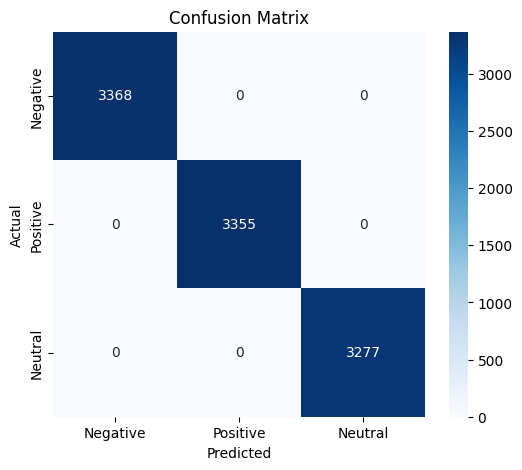

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Negative', 'Positive', 'Neutral'],
                 yticklabels=['Negative', 'Positive', 'Neutral'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# According to confusion matrix results all classes perfectly predicted but actually model overfitted to training data so results are misleading.


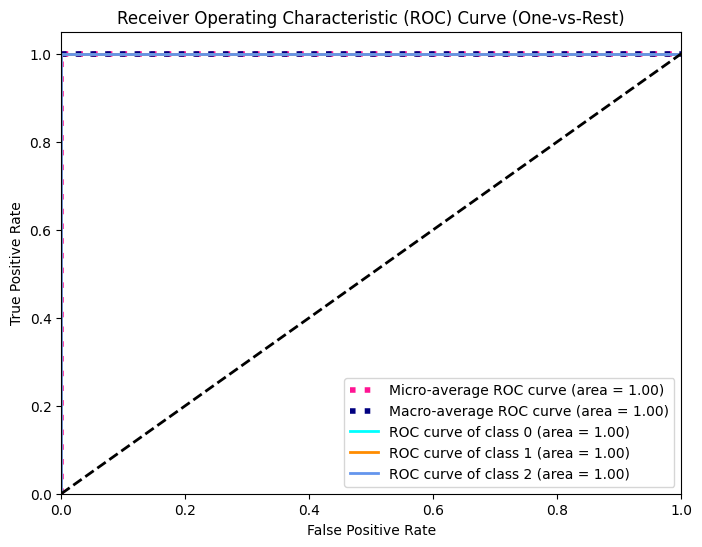

In [ ]:
# AUC ROC (One-vs-Rest for Multiclass)

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt


# Binarize the true labels for OvR
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get the probability predictions for each class
y_proba_lr = model_lr.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
## ROC-AUC scores are perfect but actually model overfitted to training data so results are misleading.


In [ ]:
# Comment sentiment analysis samples

new_reviews = [
    "I absolutely love this car, best purchase ever!",
    "Worst car I’ve ever owned, total waste of money",
    "It’s okay, not great but not terrible either",
    "Best car ever",
    "Not good, not bad",
    "Lovely car, I love it",
    "One of the worst car I ever drive!",
    "Car is good, but improvement on engine perfomance needed"
]
new_cleaned = [text_cleaner(r) for r in new_reviews]
new_tfidf = tfidf.transform(new_cleaned)
# Removed the SVD transformation step
# new_tfidf_reduced = svd.transform(new_tfidf)
# Predict using the TF-IDF transformed data directly
predictions = model_lr.predict(new_tfidf)

# Map numeric labels to text
labeled_map = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
predicted_labels = [labeled_map[p] for p in predictions]

print("\nPredictions for new reviews:", predicted_labels)

# I have used Logistic Regression to create prediction model for reviews but dataset provided has way too many duplicates,
# model cannot run away from overfitting and model results are misleading.
# I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model
# is not reliable to use to predict reviews sentiments



Predictions for new reviews: ['Positive', 'Negative', 'Neutral', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative']


### 2.2. Logistic Regression Model Prediction Report :

- I have used Logistic Regression to create prediction model for reviews but dataset provided has way too many duplicates, model cannot run away from overfitting and model results are misleading.

- I got 100% accuracy results for test dataset. Accuracy score, classification report and confusion matrix was obtained, even though results looks 100% accurate, model overfitted train dataset so results are misleading
 Since there is overfit suspicion I took some steps to prevent overfit:
- - I restricted tfidf vectorization with some parameters to restrict vocabulary and remove extremely rare/very common terms
- -  L2 regularization applied
- - GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
- - I usd TruncatedSVD to reduce noise
- - I havent seen any improvement after those steps applied
-

- ROC and AUC values are in maximum, ROC-AUC scores are perfect but actually model overfitted to training data so results are misleading.

- Confusion matrix distributed perfectly, everything catched it seems but its misleading.

- I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model is not reliable to use to predict reviews sentiments.



### 2.3. Naive Bayes Model Prediction

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# TF-IDF vectorization, we vectorize the dataset to feed model
tfidf = TfidfVectorizer()

# Determining Train dataset(X) and Target(y)
X = df_cleaned['cleaned_review_text']
y = df_cleaned['setiment_mapped']

# Vectorizing 'cleaned_review_text' column
tfidf = TfidfVectorizer(
    max_features=5000,   # limit features
    min_df=5,            # ignore words appearing < 5 times
    max_df=0.8,          # ignore words appearing in > 80% of docs
    ngram_range=(1,2)    # include unigrams + bigrams
)
X_vec = tfidf.fit_transform(X)

# Splitting data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y , test_size=0.2, random_state=42, stratify=y
)

# Training Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Using GrisSearch for parameter tuning and Kfold application
params = {'alpha': [0.1, 1, 10, 100, 1000]}
model_nb = GridSearchCV(nb_model, params, cv=5, scoring='roc_auc_ovr')
model_nb.fit(X_train, y_train)

# Evaluate model
y_pred_nb = model_nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# "cleaned_review_text" column was vectorized to be used in LSTM and Transformers
# Naive Bayes model was build with GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
# Accuracy score and classification report was obtained, even though results looks 100% accurate, model overfitted train dataset so results are misleading


Accuracy: 1.0

Confusion Matrix:
 [[3368    0    0]
 [   0 3355    0]
 [   0    0 3277]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3368
           1       1.00      1.00      1.00      3355
           2       1.00      1.00      1.00      3277

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



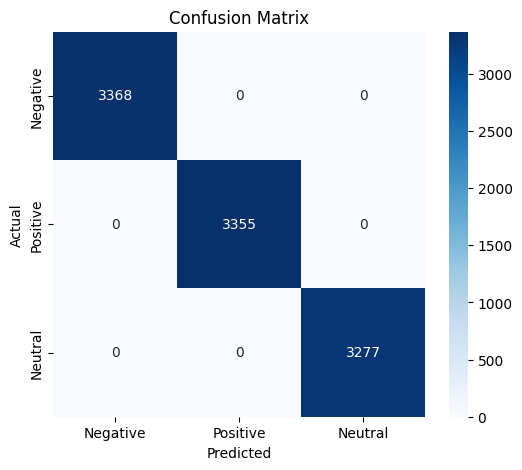

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Negative', 'Positive', 'Neutral'],
                 yticklabels=['Negative', 'Positive', 'Neutral'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# According to confusion matrix results all classes perfectly predicted but actually model overfitted to training data so results are misleading.


In [ ]:
# Comment sentiment analysis samples

new_reviews = [
    "I absolutely love this car, best purchase ever!",
    "Worst car I’ve ever owned, total waste of money",
    "It’s okay, not great but not terrible either",
    "Best car ever",
    "Not good, not bad",
    "Lovely car, I love it",
    "One of the worst car I ever drive",
    "Car is good but improvement on engine perfomance needed"
]
new_cleaned = [text_cleaner(r) for r in new_reviews]
new_tfidf = tfidf.transform(new_cleaned)
predictions = model_nb.predict(new_tfidf)

# Map numeric labels to text
labeled_map = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
predicted_labels = [labeled_map[p] for p in predictions]

print("\nPredictions for new reviews:", predicted_labels)

# I have used Naive Bayes to create prediction model for reviews but dataset provided has way too many duplicates,
# model cannot run away from overfitting and model results are misleading.
# I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model
# is not reliable to use to predict reviews sentiments


Predictions for new reviews: ['Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']


### 2.4. Naive Bayes Model Prediction Report :

- I have used Naive Bayes to create prediction model for reviews but dataset provided has way too many duplicates, model cannot run away from overfitting and model results are misleading.

- I got 100% accuracy results for test dataset.
 Since there is overfit suspicion I took some steps to prevent overfit:
- - I restricted tfidf vectorization with some parameters to restrict vocabulary and remove extremely rare/very common terms
- -  L2 regularization applied
- - GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
- - I havent seen any improvement after those steps applied

- ROC and AUC values are in maximum, ROC-AUC scores are perfect but actually model overfitted to training data so results are misleading.

- Confusion matrix distributed perfectly, everything catched it seems but its misleading.

- I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model is not reliable to use to predict reviews sentiments.

- Naive Bayes model perform worse than Logistic Regression on manuel added reviews, I believe Naive Bayes model is also not reliable to use to predict reviews sentiments.

### 2.5. LSTM Model Prediction

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8878 - loss: 0.3094 - val_accuracy: 1.0000 - val_loss: 3.2289e-06
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 1.0000 - loss: 1.5691e-04 - val_accuracy: 1.0000 - val_loss: 4.1217e-07
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 5.8689e-05 - val_accuracy: 1.0000 - val_loss: 7.9020e-08
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 1.0000 - loss: 2.1997e-05 - val_accuracy: 1.0000 - val_loss: 1.4687e-08

Test Accuracy: 1.00
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


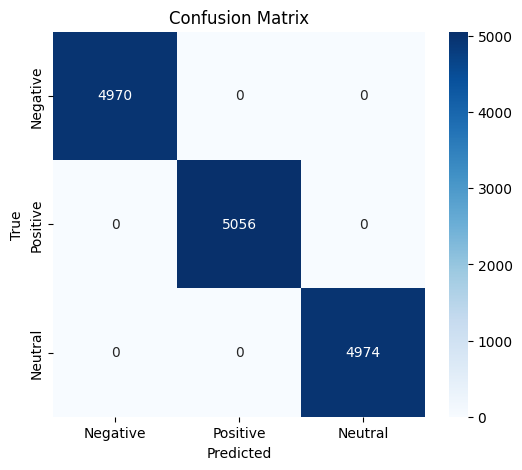


Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      4970
    Positive       1.00      1.00      1.00      5056
     Neutral       1.00      1.00      1.00      4974

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [ ]:
import pandas as pd
import string
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping


max_words = 5000 # We keep only the top 5000 most frequent words in dataset
max_len = 100 # Length of a sequence, number of tokens per review

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>") # Creating tokenizer
tokenizer.fit_on_texts(df_cleaned["cleaned_review_text"]) # Tokenize the texts in 'cleaned_review_text' column
X = tokenizer.texts_to_sequences(df_cleaned["cleaned_review_text"]) # Converting text into integer sequences
X = pad_sequences(X, maxlen=max_len)

# Target column
y = df_cleaned["setiment_mapped"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Defining and using class weights later to fight dataset imbalance
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(zip(np.unique(y_train), class_weights))

# Creating early stopping to stop once model improvement stops, this prevents overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# model_lstm = Sequential()
# model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# model_lstm.add(LSTM(64, return_sequences=False))
# model_lstm.add(Dropout(0.5))
# model_lstm.add(Dense(32, activation="relu"))
# model_lstm.add(Dropout(0.5))
# model_lstm.add(Dense(32, activation="relu"))
# model_lstm.add(Dropout(0.5))
# model_lstm.add(Dense(3, activation="softmax"))  # 3 classes: negative, positive, neutral

# Building LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len)) # Embedding layer, creating input with vector size 128 and max 100 tokens
model_lstm.add(LSTM(128, return_sequences=False)) # LSTM layer with 128 memory units
model_lstm.add(Dropout(0.5)) # Droping 50% of neurons during training
model_lstm.add(Dense(64, activation="relu")) # Dense layer with 64 neurons and relu activation function
model_lstm.add(Dropout(0.3)) # Randomly droping 30% of neurons during training
model_lstm.add(Dense(3, activation="softmax"))  # 3 classes output: negative, positive, neutral

# Model created with Adam optimizer
model_lstm.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Model training, 10 epochs used, batch size used as 64 and early stopping applied
history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    class_weight=class_weights,
    verbose=1,
    callbacks=[early_stopping],
)


# Model evaluation
loss, acc = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.2f}")

# Predictions
y_pred_prob_lstm = model_lstm.predict(X_test)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive", "Neutral"],
            yticklabels=["Negative", "Positive", "Neutral"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=["Negative","Positive","Neutral"]))


In [ ]:
# Comment sentiment analysis samples

new_reviews = [
    "I absolutely love this car, best purchase ever!",
    "Worst car I’ve ever owned, total waste of money",
    "It’s okay, not great but not terrible either",
    "Best car ever",
    "Not good, not bad",
    "Lovely car, I love it",
    "One of the worst car I ever drive",
    "Car is good but improvement on engine perfomance needed"
]

# Clean the new reviews with your text_cleaner
new_cleaned = [text_cleaner(r) for r in new_reviews]

# Convert to sequences using the same tokenizer
new_sequences = tokenizer.texts_to_sequences(new_cleaned)

# Pad them the same way as training data
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Predict with LSTM
predictions = model_lstm.predict(new_padded)

# Map numeric labels to text
labeled_map = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
predicted_labels = [labeled_map[p] for p in np.argmax(predictions, axis=1).tolist()]

print("\nPredictions for new reviews:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Predictions for new reviews: ['Neutral', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']


### 2.6. LSTM Model Prediction Report :

- Model created with max words 5000, 100 of tokens per review, 'cleaned_review_text' column tokenized to feed LSTM model.

- Class weights used to fight dataset imbalance, early stopping used to fight overfitting.

- Neural networks was created with;
- - Embedding layer, input vector size is 128 and max 100 tokens
- - LSTM layer with 128 memory units
- - Dense layer with 64 neurons and relu activation function
- - Output layer with 3 outputs and softmax activation function
- - Adam optimizer used
- - Model training done with 10 epochs, batch size as 64

- Accuracy , classification report and confusion matrix results looks perfect but same problem as previous models occured here, dataset is in very low quality and has very few unique examples to train so model cannot run from overfitting because of way to many duplicates in dataset. Even though if I remove duplicates it does not solve overfit issue.

- On manual text review data LSTM model does not work perfectly but it works better than previous models.

# Transformers :

### 2.7. BERT Model Prediction

In [ ]:
# Installing tranformers library
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
from transformers import pipeline

text_classification = pipeline("sentiment-analysis")

results = text_classification(df_cleaned["cleaned_review_text"].tolist())

# Add predictions to DataFrame
df_cleaned["predicted_label_BERT"] = [r["label"] for r in results]
df_cleaned["score_BERT"] = [r["score"] for r in results]


In [ ]:
# # Lets see how BERT work on our manual dataset

new_reviews = [
    "I absolutely love this car, best purchase ever!",
    "Worst car I’ve ever owned, total waste of money",
    "It’s okay, not great but not terrible either",
    "Best car ever",
    "Not good, not bad",
    "Lovely car, I love it",
    "One of the worst car I ever drive",
    "Car is good but improvement on engine perfomance needed"
]

# Load pretrained BERT sentiment model (binary: Positive/Negative)
sentiment_pipeline = pipeline("sentiment-analysis")

# Run predictions
results = sentiment_pipeline(new_reviews)

# Extract labels and scores
predicted_labels = [r["label"] for r in results]
scores = [r["score"] for r in results]

# Combine into DataFrame for easy review
df_results_BERT = pd.DataFrame({
    "review": new_reviews,
    "predicted_label": predicted_labels,
    "confidence_score": scores
})

df_results_BERT

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


,review,predicted_label,confidence_score
0,"I absolutely love this car, best purchase ever!",POSITIVE,0.999882
1,"Worst car I’ve ever owned, total waste of money",NEGATIVE,0.999806
2,"It’s okay, not great but not terrible either",POSITIVE,0.993356
3,Best car ever,POSITIVE,0.999847
4,"Not good, not bad",NEGATIVE,0.996694
5,"Lovely car, I love it",POSITIVE,0.999879
6,One of the worst car I ever drive,NEGATIVE,0.999784
7,Car is good but improvement on engine perfoman...,POSITIVE,0.989105


In [ ]:
df_cleaned.sample(10)

,cleaned_review_text,sentiment,setiment_mapped,predicted_label_BERT,score_BERT
43560,long wait time customer service awful,negative,0,NEGATIVE,0.999127
26055,one best bike rental iâve support staff made e...,positive,1,POSITIVE,0.998538
36725,typical rental experience decent pricing,neutral,2,POSITIVE,0.995524
40809,topnotch service great battery life,positive,1,POSITIVE,0.993395
12639,long wait time support staff awful,negative,0,NEGATIVE,0.999702
47153,worst experience ever pricing ruined entire ride,negative,0,NEGATIVE,0.999803
18144,everything fine availability could improved,neutral,2,POSITIVE,0.987193
34014,one best bike rental iâve availability made ev...,positive,1,POSITIVE,0.972175
15947,decent ride best availability,neutral,2,POSITIVE,0.999811
27828,worst experience ever return process ruined en...,negative,0,NEGATIVE,0.999802


In [ ]:
df_cleaned['predicted_label_BERT'].value_counts()

,count
predicted_label_BERT,
POSITIVE,25697
NEGATIVE,24303


### 2.8. BERT Model Prediction Report :

- I used pretrained BERT sentiment-analysis model from Hugging Face via pipeline

- BERT works efficient to understand anf distinguish texts to positive and negative.

- BERT sentiment anlaysis outcome for texts and confidence scores exctracted and included in dataframe

- According to results there are 25697 positive and 24303 negative outcomes.

- BERT model only can catch positive and negative comments so neutrals missed with this model, to catch neutrals I used RoBERTa model from Hugging Face


### 2.9. RoBERTa Model Prediction

In [ ]:
#Roberta

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline


# Load tokenizer & model (3-class sentiment: negative, neutral, positive)
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer_roberta = AutoTokenizer.from_pretrained(model_name)
model_roberta = AutoModelForSequenceClassification.from_pretrained(model_name)

# Building sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model_roberta, tokenizer=tokenizer_roberta)

label_map_roberta = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

# Running predictions
results = sentiment_pipeline(df_cleaned["cleaned_review_text"].tolist())

# Adding predictions to DataFrame
df_cleaned["predicted_label_roberta"] = [label_map_roberta[r["label"]] for r in results]
df_cleaned["score_roberta"] = [r["score"] for r in results]


In [ ]:
# Lets see how RoBERTa work on our manual dataset

new_reviews = [
    "I absolutely love this car, best purchase ever!",
    "Worst car I’ve ever owned, total waste of money",
    "It’s okay, not great but not terrible either",
    "Best car ever",
    "Not good, not bad",
    "Lovely car, I love it",
    "One of the worst car I ever drive",
    "Car is good but improvement on engine perfomance needed"
]

# Load RoBERTa pretrained model (3-class: negative, neutral, positive)
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Run predictions
results = sentiment_pipeline(new_reviews)

# Map labels to human-readable format
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

# Extract predictions
predicted_labels = [label_map[r["label"]] for r in results]
scores = [r["score"] for r in results]

# Combine into DataFrame for easy review
df_results_roberta = pd.DataFrame({
    "review": new_reviews,
    "predicted_label": predicted_labels,
    "confidence_score": scores
})

df_results_roberta

Device set to use cuda:0


,review,predicted_label,confidence_score
0,"I absolutely love this car, best purchase ever!",Positive,0.992015
1,"Worst car I’ve ever owned, total waste of money",Negative,0.953696
2,"It’s okay, not great but not terrible either",Positive,0.686323
3,Best car ever,Positive,0.971106
4,"Not good, not bad",Negative,0.578665
5,"Lovely car, I love it",Positive,0.990607
6,One of the worst car I ever drive,Negative,0.969541
7,Car is good but improvement on engine perfoman...,Positive,0.692147


In [ ]:
df_cleaned.sample(5)

,cleaned_review_text,sentiment,setiment_mapped,predicted_label_BERT,score_BERT,predicted_label_roberta,score_roberta
16828,expensive poor quality seat comfort,negative,0,NEGATIVE,0.982861,NEGATIVE,0.889205
4096,everything booking ride flawless loved custome...,positive,1,POSITIVE,0.999601,POSITIVE,0.932990
14041,nothing went smoothly especially customer service,negative,0,NEGATIVE,0.999539,NEGATIVE,0.918710
18286,long wait time pricing awful,negative,0,NEGATIVE,0.999619,NEGATIVE,0.954258
46392,bike decent seat comfort okay,neutral,2,POSITIVE,0.999639,POSITIVE,0.750959


In [ ]:
df_cleaned['predicted_label_roberta'].value_counts()

,count
predicted_label_roberta,
POSITIVE,22718
NEGATIVE,17111
NEUTRAL,10171


### 2.10. RoBERTa Model Prediction Report :

- I used pretrained RoBERTa sentiment-analysis model from Hugging Face via pipeline

- RoBERTa works efficient to understand and distinguish texts to positive, negative and neutral.

- RoBERTa sentiment analysis outcome for texts and confidence scores exctracted and included in dataframe

- According to results there are 22718 positive, 17111 negative and 10171 neutral outcomes.

- RoBERTa can be used to achieve positive, neutral and negative sentiment analysis on this dataset

##  2.11. Sentiment Analysis Report :

### Logistic Regression Model Prediction Report :

- I have used Logistic Regression to create prediction model for reviews but dataset provided has way too many duplicates, model cannot run away from overfitting and model results are misleading.

- I got 100% accuracy results for test dataset. Accuracy score, classification report and confusion matrix was obtained, even though results looks 100% accurate, model overfitted train dataset so results are misleading
 Since there is overfit suspicion I took some steps to prevent overfit:
- - I restricted tfidf vectorization with some parameters to restrict vocabulary and remove extremely rare/very common terms
- -  L2 regularization applied
- - GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
- - I usd TruncatedSVD to reduce noise
- - I havent seen any improvement after those steps applied
-

- ROC and AUC values are in maximum, ROC-AUC scores are perfect but actually model overfitted to training data so results are misleading.

- Confusion matrix distributed perfectly, everything catched it seems but its misleading.

- I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model is not reliable to use to predict reviews sentiments.


### Naive Bayes Model Prediction Report :

- I have used Naive Bayes to create prediction model for reviews but dataset provided has way too many duplicates, model cannot run away from overfitting and model results are misleading.

- I got 100% accuracy results for test dataset.
 Since there is overfit suspicion I took some steps to prevent overfit:
- - I restricted tfidf vectorization with some parameters to restrict vocabulary and remove extremely rare/very common terms
- -  L2 regularization applied
- - GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
- - I havent seen any improvement after those steps applied

- ROC and AUC values are in maximum, ROC-AUC scores are perfect but actually model overfitted to training data so results are misleading.

- Confusion matrix distributed perfectly, everything catched it seems but its misleading.

- I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model is not reliable to use to predict reviews sentiments.

- Naive Bayes model perform worse than Logistic Regression on manuel added reviews, I believe Naive Bayes model is also not reliable to use to predict reviews sentiments.

### LSTM Model Prediction Report :

- Model created with max words 5000, 100 of tokens per review, 'cleaned_review_text' column tokenized to feed LSTM model.

- Class weights used to fight dataset imbalance, early stopping used to fight overfitting.

- Neural networks was created with;
- - Embedding layer, input vector size is 128 and max 100 tokens
- - LSTM layer with 128 memory units
- - Dense layer with 64 neurons and relu activation function
- - Output layer with 3 outputs and softmax activation function
- - Adam optimizer used
- - Model training done with 10 epochs, batch size as 64

- Accuracy , classification report and confusion matrix results looks perfect but same problem as previous models occured here, dataset is in very low quality and has very few unique examples to train so model cannot run from overfitting because of way to many duplicates in dataset. Even though if I remove duplicates it does not solve overfit issue.

- On manual text review data LSTM model does not work perfectly but it works better than previous models.

### BERT Model Prediction Report :

- I used pretrained BERT sentiment-analysis model from Hugging Face via pipeline

- BERT works efficient to understand anf distinguish texts to positive and negative.

- BERT sentiment anlaysis outcome for texts and confidence scores exctracted and included in dataframe

- According to results there are 25697 positive and 24303 negative outcomes.

- BERT model only can catch positive and negative comments so neutrals missed with this model, to catch neutrals I used RoBERTa model from Hugging Face

### RoBERTa Model Prediction Report :

- I used pretrained RoBERTa sentiment-analysis model from Hugging Face via pipeline

- RoBERTa works efficient to understand and distinguish texts to positive, negative and neutral.

- RoBERTa sentiment analysis outcome for texts and confidence scores exctracted and included in dataframe

- According to results there are 22718 positive, 17111 negative and 10171 neutral outcomes.

- RoBERTa can be used to achieve positive, neutral and negative sentiment

# Final Report :

## Data Collection and Preprocessing :

- Dataset has 2 columns and 50000 rows. "review_text" column contains reviews as text from users and "sentiment" column contains feedback class as 'positive', 'negative' or 'neutral'.

- Dataset has 49700 duplicates out of 50000, this is very bad for model training because overfit is inevitable with this dataset.

- No null values obtained.

- Preprocessing applied on text to remove punctuation and stopwords, also text lowercased, lemmatized and tokenized.

- Sentiment column mapped with numbers to be used as target in model

- I trained models with and without duplicates, both gave worst results but with duplicates models gave little bit better results so I kept duplicates.

##  Sentiment Analysis :

#### Logistic Regression Model Prediction :

- I have used Logistic Regression to create prediction model for reviews but dataset provided has way too many duplicates, model cannot run away from overfitting and model results are misleading.

- I got 100% accuracy results for test dataset. Accuracy score, classification report and confusion matrix was obtained, even though results looks 100% accurate, model overfitted train dataset so results are misleading
 Since there is overfit suspicion I took some steps to prevent overfit:
- - I restricted tfidf vectorization with some parameters to restrict vocabulary and remove extremely rare/very common terms
- -  L2 regularization applied
- - GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
- - I usd TruncatedSVD to reduce noise
- - I havent seen any improvement after those steps applied
-

- ROC and AUC values are in maximum, ROC-AUC scores are perfect but actually model overfitted to training data so results are misleading.

- Confusion matrix distributed perfectly, everything catched it seems but its misleading.

- I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model is not reliable to use to predict reviews sentiments.


#### Naive Bayes Model Prediction :

- I have used Naive Bayes to create prediction model for reviews but dataset provided has way too many duplicates, model cannot run away from overfitting and model results are misleading.

- I got 100% accuracy results for test dataset.
 Since there is overfit suspicion I took some steps to prevent overfit:
- - I restricted tfidf vectorization with some parameters to restrict vocabulary and remove extremely rare/very common terms
- -  L2 regularization applied
- - GridSearchCV to select best paramater tuning, K-fold 5 applied and class_weight='balanced' added to fight data imbalance
- - I havent seen any improvement after those steps applied

- ROC and AUC values are in maximum, ROC-AUC scores are perfect but actually model overfitted to training data so results are misleading.

- Confusion matrix distributed perfectly, everything catched it seems but its misleading.

- I have provided manual reviews to model and got predictions, it works good on some samples and bad on some samples, so this model is not reliable to use to predict reviews sentiments.

- Naive Bayes model perform worse than Logistic Regression on manuel added reviews, I believe Naive Bayes model is also not reliable to use to predict reviews sentiments.

#### LSTM Model Prediction :

- Model created with max words 5000, 100 of tokens per review, 'cleaned_review_text' column tokenized to feed LSTM model.

- Class weights used to fight dataset imbalance, early stopping used to fight overfitting.

- Neural networks was created with;
- - Embedding layer, input vector size is 128 and max 100 tokens
- - LSTM layer with 128 memory units
- - Dense layer with 64 neurons and relu activation function
- - Output layer with 3 outputs and softmax activation function
- - Adam optimizer used
- - Model training done with 10 epochs, batch size as 64

- Accuracy , classification report and confusion matrix results looks perfect but same problem as previous models occured here, dataset is in very low quality and has very few unique examples to train so model cannot run from overfitting because of way to many duplicates in dataset. Even though if I remove duplicates it does not solve overfit issue.

- On manual text review data LSTM model does not work perfectly but it works better than previous models.


### BERT Model Prediction Report :

- I used pretrained BERT sentiment-analysis model from Hugging Face via pipeline

- BERT works efficient to understand anf distinguish texts to positive and negative.

- BERT sentiment anlaysis outcome for texts and confidence scores exctracted and included in dataframe

- According to results there are 25697 positive and 24303 negative outcomes.

- BERT model only can catch positive and negative comments so neutrals missed with this model, to catch neutrals I used RoBERTa model from Hugging Face

### RoBERTa Model Prediction Report :

- I used pretrained RoBERTa sentiment-analysis model from Hugging Face via pipeline

- RoBERTa works efficient to understand and distinguish texts to positive, negative and neutral.

- RoBERTa sentiment analysis outcome for texts and confidence scores exctracted and included in dataframe

- According to results there are 22718 positive, 17111 negative and 10171 neutral outcomes.

- RoBERTa can be used to achieve positive, neutral and negative sentiment for this task.

### Overall Model Choose :

- Overall, RoBERTa (Transformers) is the best model to make sentiment analysis on bike rental feedback data to understand if comment is positive, neutral or negative.